# 数据分析基础项目

## 分析数据集

泰坦尼克号数据：包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

## 分析的问题

在泰坦尼克号里，是哪些因素影响着幸存率？
可能影响的因素：
1. 性别
2. 年龄
3. 船票种类
4. 是否为船员

## 预览数据

In [83]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic-data.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 清理数据
先检查以下字段是否正常：
 - 性别为空或异常值

In [3]:
# 性别为空或异常值，执行后没有发现异常
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [4]:
# 查看幸存人数 用于之后对统计后的值进行验证
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


## 分析幸存率是否和性别有关
分别求出男性和女性的生还率，然后生成直方图

In [52]:
has_sex_df = df[~df['Sex'].isnull()]
has_sex_df['Sex'].count()

891

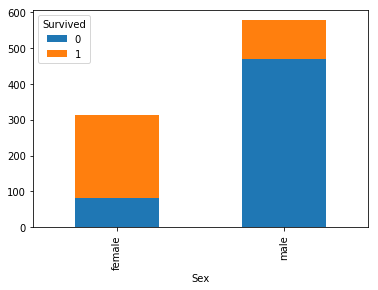

In [121]:
%matplotlib inline
has_sex_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')

### 分析幸存率和性别的结果

从上图中我们可以看出，在泰坦尼克号上女性的幸存率要比男性高出很多，所以极有可能跟性别有关，但是我们还需要再分析一下其它一些因素。

## 分析幸存率是否与年龄有关

我们可以猜测，年轻人要比老年人或者儿童在遇到危险时，有更强的求生能力，能更快速躲避危险，所以我们需要依据年龄进行分析，看看是否与年龄有关。

    设计分析过程：
1. 检查数据完整性（年龄），过滤掉缺少信息的记录
2. 将年龄进行分段，以10岁为一个阶段进行划分
   划分后，0-9岁一组，10-19岁一组，以此类推
3. 分析各年龄段的幸存率

In [55]:
# 去除没有年龄的记录
age_not_null_df = df[~df['Age'].isnull()]
age_not_null_df['Age'].count()

714

In [60]:
# 
max_age = age_not_null_df['Age'].max()
min_age = age_not_null_df['Age'].min()
print(max_age, min_age)

(80.0, 0.42)


In [258]:
# 这一块代码不起作用，调试好久也没成功，所以用了后面的pd.cut()函数
# 转换函数，将年龄转换成年龄段
#def convert_age_section(data):
# bins = range(0,101,10)
# labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','>90']
# return pd.qcut(data,bins,labels=labels,duplicates="drop")

#age_not_null_df['Age'].apply(convert_age_section)

In [272]:
# 将年龄转换成年龄段
bins = range(0,91,10)
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
age_not_null_df['age_sec']=pd.cut(age_not_null_df['Age'],bins,right=False,labels=labels)
age_not_null_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_sec
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


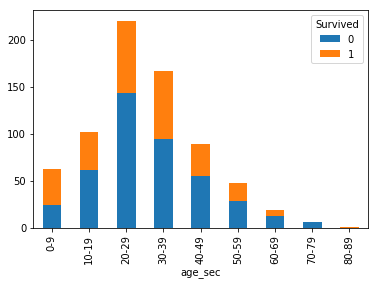

In [279]:
# 按年龄段分组
age_not_null_df.groupby(['age_sec','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')

In [119]:
#df.pivot_table(index='Sex', values='Age', aggfunc=np.mean) #.plot()
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [118]:
df.pivot_table(index=["Pclass","Sex"], values=["Age", "Fare"], aggfunc=np.mean)

Age        Fare
Pclass Sex                          
1      female  34.611765  106.125798
       male    41.281386   67.226127
2      female  28.722973   21.970121
       male    30.740707   19.741782
3      female  21.750000   16.118810
       male    26.507589   12.661633

## 参考资料
[Pandas简易入门（二） - kylinlin - 博客园](http://www.cnblogs.com/kylinlin/p/5226860.html)  
[python 报ValueError: Bin labels must be one fewer than the number of bin edges](https://blog.csdn.net/Norsaa/article/details/77774634)  